In [1]:
import cfbd
import numpy as np
import pandas as pd
import os

In [2]:
config = cfbd.Configuration()
config.api_key['Authorization'] = os.environ.get('CFBD_API_KEY')
config.api_key_prefix['Authorization'] = 'Bearer'
api_config = cfbd.ApiClient(config)

In [3]:
teams_api = cfbd.TeamsApi(api_config)
teams_api.get_fbs_teams()

[{'abbreviation': 'AFA',
  'alt_color': '#ffffff',
  'alt_name_1': None,
  'alt_name_2': None,
  'alt_name_3': None,
  'classification': None,
  'color': '#004a7b',
  'conference': 'Mountain West',
  'division': 'Mountain',
  'id': 2005,
  'location': {'capacity': 46692.0,
               'city': 'Colorado Springs',
               'country_code': 'US',
               'dome': False,
               'elevation': 2024.875732,
               'grass': False,
               'latitude': 38.9969701,
               'longitude': -104.8436165,
               'name': 'Falcon Stadium',
               'state': 'CO',
               'timezone': 'America/Denver',
               'venue_id': 3713,
               'year_constructed': 1962.0,
               'zip': '80840'},
  'logos': ['http://a.espncdn.com/i/teamlogos/ncaa/500/2005.png',
            'http://a.espncdn.com/i/teamlogos/ncaa/500-dark/2005.png'],
  'mascot': 'Falcons',
  'school': 'Air Force',
  'twitter': '@AF_Football'},
 {'abbreviation': 'AKR'

In [7]:
games_api = cfbd.GamesApi(api_config)
games = games_api.get_games(year=2022)
games[0]

{'attendance': None,
 'away_conference': 'Atlantic Sun',
 'away_division': 'fcs',
 'away_id': 2046,
 'away_line_scores': [10, 7, 3, 7],
 'away_points': 27,
 'away_post_win_prob': 0.04572357337737354,
 'away_postgame_elo': None,
 'away_pregame_elo': None,
 'away_team': 'Austin Peay',
 'conference_game': False,
 'excitement_index': 2.6135509766,
 'highlights': None,
 'home_conference': 'Conference USA',
 'home_division': 'fbs',
 'home_id': 98,
 'home_line_scores': [7, 14, 0, 17],
 'home_points': 38,
 'home_post_win_prob': 0.9542764266226265,
 'home_postgame_elo': 1684,
 'home_pregame_elo': 1684,
 'home_team': 'Western Kentucky',
 'id': 401426532,
 'neutral_site': False,
 'notes': None,
 'season': 2022,
 'season_type': 'regular',
 'start_date': '2022-08-27T16:00:00.000Z',
 'start_time_tbd': False,
 'venue': 'Houchens Industries-L. T. Smith Stadium',
 'venue_id': 3796,
 'week': 1}

In [13]:
df = pd.DataFrame.from_records([dict(home_team=g.home_team, home_points=g.home_points, away_team=g.away_team, away_points=g.away_points) for g in games])
df.head()

,home_team,home_points,away_team,away_points
0,Western Kentucky,38.0,Austin Peay,27.0
1,Northwestern,31.0,Nebraska,28.0
2,Florida Memorial University,39.0,Edward Waters,34.0
3,UNLV,52.0,Idaho State,21.0
4,Jacksonville State,42.0,Stephen F. Austin,17.0


Text(0, 0.5, 'away points')

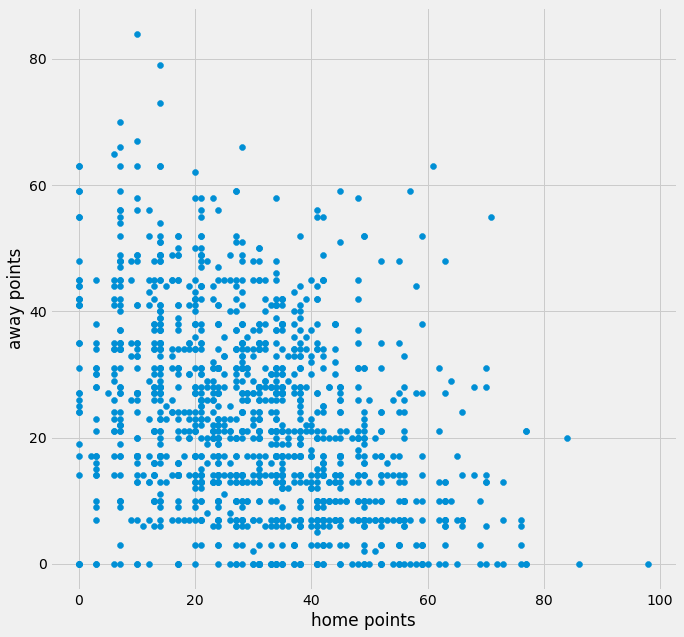

In [14]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [10, 10]

plt.scatter(df['home_points'], df['away_points'])
plt.xlabel('home points')
plt.ylabel('away points')